In [18]:
#imports 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

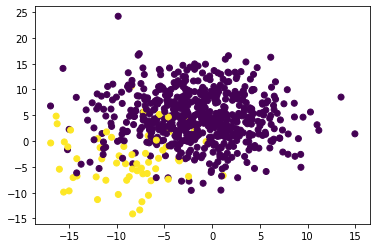

In [2]:
#create unbalanced dataset
X, y = make_blobs(n_samples=[600, 60], random_state=1, cluster_std=5)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
#split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 451, 1: 44})

In [8]:
#randomly oversample minority class
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 451, 1: 451})

In [10]:
#logistic regression with oversampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [13]:
#generate confusion matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[131,  18],
       [  1,  15]])

In [14]:
#check accuracy
balanced_accuracy_score(y_test, y_pred)

0.9083473154362416

In [17]:
#generate classification report
print(classification_report_imbalanced(y_test,y_pred))

pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.88      0.94      0.93      0.91      0.82       149
          1       0.45      0.94      0.88      0.61      0.91      0.83        16

avg / total       0.94      0.88      0.93      0.90      0.91      0.82       165



# SMOTE


In [19]:
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

In [20]:
Counter(y_resampled)

Counter({0: 451, 1: 451})

In [21]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
balanced_accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report_imbalanced(y_test, y_pred))

pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.89      0.94      0.94      0.91      0.83       149
          1       0.48      0.94      0.89      0.64      0.91      0.84        16

avg / total       0.94      0.90      0.93      0.91      0.91      0.83       165

